### RADS 605 Advanced Modeling
- **Parin Kittipongdaja**
- **RADS 6136454 RADS/M**
- **Assignment II: Sentiment Analysis**

# อธิบาย

1. Importing Required Libraries
2. Importing the Dataset
    - เป็น data ที่มาจากการดึงข้อมูล Web scrapping ความคิดเห็นต่อโรงพยาบาลรามาธิบดี บนเว็ป Honestdoc ซึงเป็นภาษาไทย แต่เพื่อให้ง่ายต่อการวิเคราะห์ในขั้นเริ่มต้น จึงทำการแปลงเป็นภาษาอังกฤษด้วย Google API แล้วจึงค่อยทำการ วิเคราะห์
    - ประเด็นที่น่าสนใจ ต้องระวังคือ Unicode ของ ภาษาที่เว็บนั้นใช้ เพราะเมื่อดึงออกมาแล้ว อาจะมีบางตัวที่ python หรือ library ที่เราใช้วิเคราะห์ข้อมูลอ่านไม่ออก เช่น การขึ้นบรรทัดใหม่ใช้ \r แทน \n และ white space bar บางอันก็กลายเป็น \xa0 \xc2 ซึ่ง อาจต้อง handle ตรงนี้ก่อนไปทำการวิเคราะห์ ซึ่งสามารถทำได้ในขั้น preprocessing หรือ อาจจะทำการเซฟออกไปเป็น csv ก่อนเลยโดยการ encode ให้เป็น UTF-8 แต่อันนี้ไม่แน่ใจว่าจะหายไหม ถ้าไม่ได้จัดการ \r ก่อน เพราะถ้าไม่หาย ตอน import เข้ามาผ่าน pandas ก็จะกลายเป็นอ่านไม่ออกเหมือนกัน
3. Data Exploration
4. Data Pre-processing
    - Prepare the data
    - Set sentiment class
    - Split data to feature and class(target)
    - Split data to train and test
5. Tuning and Develop Model
    - Set parameter for tuning
    - Tuning Model
    - Save the model to disk
    - Load the model from disk
6. Evaluate Model
    - Balanced Accuracy
        - เนื่องจากกำหนดให้ data เป็น imbalanced class เลยอาจต้องใช้ score ตัวนี้ 
7. Choose The Best Model
8. Syntactic Analysis

# Methods

This study consists of 10 processes. The details are as follows;

1. Data acquisition 
The collection of data in this study is retrieved from social media call "honestdocs.co" with the score range from 1(dissatisfaction) to 5 (satisfaction).

2. Translate all customers' comments into English
Since there are many tools for text processing in English such as excellent NLTK, simple TextBlob or the fastest syntactic parser spaCy, while, there are not quite much in Thai language. Therefore, we decide to translate all comment into English language. Google translate API is used in this step.  

3. Deduplicate comments and elimination the row with having a null value

4. Text preprocessing
After collecting the data, the preprocessing phase allows to reduce noise in data includes normalizing text to the same unicode, lowering case, removing punctuation and emoticons, expanding contraction, removal of Stop words, word lemmatizations.

5. Encoding 
For sentiment analysis, we would like to know what is make customer dissatisfaction and satisfaction. Hence, we will encode commnet with score 1s, 2s, and 3s to negative class and score 4s and 5s to positive class.

6. Split data
For developing sentiment classifier, we will split data into two sets which are training (training data and validation data) and testing set with stratifying class. We develop a new model on the training set and test it on the holdout set.

7. Feature extraction
Features play a key role in determining the performance of the model. In this study, we perform TF-IDF (Term Frequency–Inverse Document Frequency) for feature extraction and LDA (Latent Dirichlet allocation) for dimension reduction.

8. Developing model and Fine-tuning hyperparameter
In this study, we will develop a model from three machine learning algorithm are (1)Naive bayes, (2)Decision tree,and (3)Support Vector Machine. Each model hyperparameters are tuned by using random and grid search based on balanced accuracy to get the best parameter. 

9. Evaluation
After that, we get the model we will evaluate it with testing set. Due to this study is sentiment analysis that focuses on how to manage complaint or dissatisfaction from the patient, the model evaluation should be based on negative class rather than positive class. The metrics that we choose to evaluate in this study should mainly based on precision on negative class and other metrics such as balanced accuracy, recall, and F1 to estimate performance. We will choose the best model with the highest performance. 

(by using balanced accuracy and other metrics such as accuracy, precision, recall, and F1 to estimate performance. We will choose the best model with the highest performance.)

10. Syntactic analysis and visualization 
To find what is dissatisfaction and satisfaction of the customer, we have to know what is the topic customer said. The final step is syntactic of each comment which analyzed using POS tagging and shallow parsing. All noun phrase is extracted and presented as the comment topic. For visualizing comment topic separated by the sentiment prediction (i.e., positive and negative). All topic will be summarized and presents in bag of word form (term-frequency). This information will be visualized by word cloud and the topic sizes represent term frequency (i.e., the bigger font means the more frequency topic).

# Install Neccessary Library

# Check Version of Library

In [1]:
import sys
import numpy as np
import matplotlib
import tqdm
import sklearn
import nltk
import pandas
import wordcloud


print ( "Python", sys.version )
print ( "Numpy", np.__version__ )
print ( "Matplotlib", matplotlib.__version__ )
print ( "tqdm", tqdm.__version__ )
print ( "scikit-learn", sklearn.__version__ )
print ( "nltk", nltk.__version__ )
print ( "pandas", pandas.__version__ )
print ( "wordcloud", wordcloud.__version__ )

Python 3.7.1 (default, Nov  6 2018, 18:45:35) 
[Clang 10.0.0 (clang-1000.11.45.5)]
Numpy 1.14.6
Matplotlib 3.0.3
tqdm 4.31.1
scikit-learn 0.20.3
nltk 3.4.1
pandas 0.24.2
wordcloud 1.5.0


# Importing Required Libraries

In [2]:
# Basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
from tqdm import tqdm
from itertools import cycle
Fignum = cycle(range(1,20))

# Data preprocessing
import re
import contractions
import unicodedata
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

with open('stopwords.txt') as file:
    stop_words = file.read()
stop = stop_words.split('\n')

from sklearn.model_selection import train_test_split

# Tuning and Develop Model
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import scipy as sp
from sklearn.externals import joblib

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# Data Visualization
from wordcloud import WordCloud
from nltk import pos_tag
from collections import Counter
from textblob import TextBlob
from textblob.np_extractors import ConllExtractor
extractor = ConllExtractor()
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
import matplotlib.image as mpimg

# Set dataframe display

In [3]:
pd.set_option('display.max_columns', None)  # default = 20
pd.set_option('display.expand_frame_repr', False) # True
pd.set_option('display.max_colwidth', -1) # 50

# Create function for conducting Sentiment Analysis

## Pre-processing function

In [4]:
# Modify Stop-words
remove_word = ('not', 'no')
new_stop = [i for i in stop if i not in remove_word]

In [5]:
# Prepare the data
def pre_process(text):
    
    # Normalize text to same unicode
    # Replacing non-breaking space ('\xc2\xa0') with a space.
    text = unicodedata.normalize("NFKD", text)
    
    # Lower Case
    text = text.lower()
    
    # Removing Punctuation
    text = re.sub(r'[^\w\s]','',text)
    
    # Expand contraction
    text = contractions.fix(text)
    
    # Removal of Stop Words
    text = " ".join(x for x in text.split() if x not in new_stop)
    
    # Word Lemmatization
    text = " ".join(lemmatizer.lemmatize(x) for x in text.split())
    
    return text

In [6]:
# Split data to train and test
def split_data(X,y):
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.20, random_state=7, stratify=y)
    print("Size of training data is " + str(X_trn.shape))
    print("Size of training label is " + str(y_trn.shape))
    unique, counts = np.unique(y_trn, return_counts=True)
    print('Class Counts:',np.asarray((unique, counts)).T.ravel())
    print()
    print("Size of testing data is " + str(X_tst.shape))
    print("Size of testing label is " + str(y_tst.shape))
    unique, counts = np.unique(y_tst, return_counts=True)
    print('Class Counts:',np.asarray((unique, counts)).T.ravel())
    print()
    unique, counts = np.unique(y, return_counts=True)
    print('Total Class Counts:',np.asarray((unique, counts)).T.ravel())
    return X_trn, X_tst, y_trn, y_tst

## Development Function

## TFIDF & LDA & MultinomialNB

In [7]:
# MultinomialNB
def MNB_HPTune(X, y, verbose = 0):
    tfidf = TfidfVectorizer(min_df=2)
    lda = LatentDirichletAllocation(random_state=7)
    clf = MultinomialNB()
    pipe = Pipeline([('TFIDF', tfidf),
                     ('LDA', lda),
                     ('MNB', clf)])
    
    # Define Search Param
    param_dist = dict(TFIDF__ngram_range = ((1,2), (1,3)),
                      LDA__n_components = np.arange(10,200,10),
                      MNB__alpha= np.append(np.logspace(-3,2,num=20),0)
                     )
    rs = RandomizedSearchCV(estimator=pipe,
                            param_distributions=param_dist,
                            refit=True,
                            scoring=score_param,
                            n_iter=n_iter_search,
                            cv=cv,
                            n_jobs=-1,
                            random_state=7,
                            iid=True)
    if verbose == 1:
        start = time()    
        rs.fit(X,y)
        print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings." 
              % (time() - start, len(rs.cv_results_['params'])))

    elif verbose == 0:
        rs.fit(X,y)
    
    # Best parameter from RandomizedSearchCV
    
    bs_var_ncom = rs.best_params_['LDA__n_components']
    bs_var_alpha = rs.best_params_['MNB__alpha']
    bs_var_alpha = np.log10(bs_var_alpha)
    
    param_grid = dict(TFIDF__ngram_range = ((1,2), (1,3)),
                      LDA__n_components = np.arange(bs_var_ncom-20,bs_var_ncom+20,5),
                      MNB__alpha= np.append(np.logspace(bs_var_alpha-1,bs_var_alpha+1,num=5),0)
                     )
    gs = GridSearchCV(estimator=pipe, 
                      param_grid=param_grid,
                      refit=True,
                      scoring=score_param,
                      cv=cv,
                      n_jobs=-1, 
                      iid=True)
    
    if verbose == 1:
        start = time()
        gs.fit(X,y)
        print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
              % (time() - start, len(gs.cv_results_['params'])))

    elif verbose == 0:
        gs.fit(X,y)
    
    return rs, gs

## TFIDF & LDA & Decision Tree

In [8]:
# Decision Tree
def DT_HPTune(X, y, verbose = 0):
    tfidf = TfidfVectorizer(min_df=2)
    lda = LatentDirichletAllocation(random_state=7)
    clf = DecisionTreeClassifier(random_state=7)
    pipe = Pipeline([('TFIDF', tfidf),
                     ('LDA', lda),
                     ('DT', clf)])
    # Define Search Param
    param_dist = dict(TFIDF__ngram_range = ((1,2), (1,3)),
                      LDA__n_components = np.arange(40,200,10),
                      DT__criterion = ['gini', 'entropy'],
                      DT__max_depth = np.arange(6,20,1)
                     )
    rs = RandomizedSearchCV(estimator=pipe,
                            param_distributions=param_dist,
                            refit=True,
                            scoring=score_param,
                            n_iter=n_iter_search,
                            cv=cv,
                            n_jobs=-1,
                            random_state=7,
                            iid=True)
    if verbose == 1:
        start = time()    
        rs.fit(X,y)
        print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings." 
              % (time() - start, len(rs.cv_results_['params'])))

    elif verbose == 0:
        rs.fit(X,y)
    
    # Best parameter from RandomizedSearchCV
    bs_var_ncom = rs.best_params_['LDA__n_components']
    bs_var_cri = rs.best_params_['DT__criterion']
    bs_var_maxd = rs.best_params_['DT__max_depth']
    
    param_grid = dict(TFIDF__ngram_range = ((1,2), (1,3)),
                        LDA__n_components = np.arange(bs_var_ncom-10,bs_var_ncom+10,5),
                        DT__criterion = [bs_var_cri],  
                        DT__max_depth = np.arange(bs_var_maxd-3,bs_var_maxd+3,1)
                     )
    gs = GridSearchCV(estimator=pipe, 
                      param_grid=param_grid,
                      refit=True,
                      scoring=score_param,
                      cv=cv,
                      n_jobs=-1, 
                      iid=True)
    
    if verbose == 1:
        start = time()
        gs.fit(X,y)
        print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
              % (time() - start, len(gs.cv_results_['params'])))

    elif verbose == 0:
        gs.fit(X,y)
    
    return rs, gs

## TFIDF & LDA & SVM

In [9]:
# Support Vector Machine
def SVM_HPTune(X, y, verbose = 0):
    tfidf = TfidfVectorizer(min_df=2)
    lda = LatentDirichletAllocation(random_state=7)
    clf = SVC(probability=True)
    pipe = Pipeline([('TFIDF', tfidf),
                     ('LDA', lda),
                     ('SVM', clf)])
    
    # Define Search Param
    param_dist = dict(TFIDF__ngram_range = ((1,2), (1,3)),
                      LDA__n_components = np.arange(10,200,10),
                      SVM__C = np.logspace(-10,5,num=30),
                      SVM__gamma = np.logspace(-10,5,num=30),
                      SVM__kernel = ['sigmoid', 'rbf','linear','poly'],
                      #SVM__decision_function_shape = ('ovo','ovr')
                     )
    rs = RandomizedSearchCV(estimator=pipe,
                            param_distributions=param_dist,
                            refit=True,
                            scoring=score_param,
                            n_iter=n_iter_search,
                            cv=cv,
                            n_jobs=-1,
                            random_state=7,
                            iid=True)
    if verbose == 1:
        start = time()    
        rs.fit(X,y)
        print("RandomizedSearchCV took %.2f seconds for %d candidate parameter settings." 
              % (time() - start, len(rs.cv_results_['params'])))

    elif verbose == 0:
        rs.fit(X,y)
    
    # Best parameter from RandomizedSearchCV
    bs_ngram = rs.best_params_['TFIDF__ngram_range']
    bs_var_ncom = rs.best_params_['LDA__n_components']
    bs_C = rs.best_params_['SVM__C'] 
    bs_gamma = rs.best_params_['SVM__gamma'] 
    bs_kernel = rs.best_params_['SVM__kernel']
    #bs_dfs = rs.best_params_['SVM__decision_function_shape'] 
    d_C = np.log10(bs_C)
    d_gamma = np.log10(bs_gamma)
    
    param_grid = dict(TFIDF__ngram_range = [bs_ngram],
                      LDA__n_components = np.arange(bs_var_ncom-5,bs_var_ncom+5,5),
                      SVM__C = np.logspace(d_C-1,d_C+4,num=5),
                      SVM__gamma = np.logspace(d_gamma-1,d_gamma+1,num=5),
                      SVM__kernel = [bs_kernel,'rbf'],
                      #SVM__decision_function_shape = [bs_dfs]
                     )
    gs = GridSearchCV(estimator=pipe, 
                      param_grid=param_grid,
                      refit=True,
                      scoring=score_param,
                      cv=cv,
                      n_jobs=-1, 
                      iid=True)
    
    if verbose == 1:
        start = time()
        gs.fit(X,y)
        print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
              % (time() - start, len(gs.cv_results_['params'])))

    elif verbose == 0:
        gs.fit(X,y)
    
    return rs, gs

## Evaluation and Report Function

In [10]:
# Plot ROC Curve
def plot_roc(X_test, y_test, GridSearchCV_List, tittle=''):
    
    # Define cycol for iteration color
    from itertools import cycle
    cycol = cycle('bgrcmyk')
    cycol2 = cycle('bgrcmyk')
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title('Figure '+ str((next(Fignum))) + ': ROC curve ' + tittle)  
    
    for i in GridSearchCV_List:
         
        P_true = eval(i+'.predict_proba(X_test)[:, 1]')
        fpr, tpr, thresholds = roc_curve(y_test, P_true, pos_label=1)
        auc = round(roc_auc_score(y_test, P_true), 2)

        ax.plot(fpr, tpr, color=next(cycol), label=i[:-3]+", auc=" + str(auc))
        ax.fill_between(fpr, 0, tpr, color=next(cycol2), alpha=0.2)
        ax.plot(ax.get_ylim(), ax.get_xlim(), color="gray", linestyle=':',linewidth=1.5)
        ax.set_xlabel("FPR")
        ax.set_ylabel("TPR")
        ax.set_xlim(left=0, right=1)
        ax.set_ylim(bottom=0, top=1)
        plt.legend(loc="best")
    
    plt.show()    

# Plot PR Curve 
def plot_pr(X_test, y_test, GridSearchCV_List, lab =1, tittle=''):
    
    # Define color for iteration color
    from itertools import cycle
    cycol = cycle('bgrcmyk')
    cycol2 = cycle('bgrcmyk')
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_title('Figure '+ str((next(Fignum))) + ': PR curve ' + tittle)
    
    for i in GridSearchCV_List:
        
        P_true = eval(i+'.predict_proba(X_test)[:, 1]')
        ap = round(average_precision_score(y_test, P_true, pos_label=lab), 2)
        precision, recall, thresholds = precision_recall_curve(y_test, P_true, pos_label=lab)
        
        ax.plot(recall, precision, color=next(cycol), label=i[:-3]+", average precision=" + str(ap))
        ax.fill_between(recall, 0, precision, color=next(cycol2), alpha=0.2)
        ax.set_xlabel("Recall")
        ax.set_ylabel("Precision")
        ax.set_xlim(left=0, right=1)
        ax.set_ylim(bottom=0, top=1)
        plt.legend(loc="best")

    plt.show()    


# Make a model summary report
def model_report(X_test,y_test,GridSearchCV_List):

    model_list = []
    accuracy_list = []
    balanced_acc_list = []
    auc_list = []
    cm_list = []
    recall_list = []
    precision_list = []
    precision_neg_list = []
    specificity_list = []
    ap_list = []
    f1_list = []
    best_params_list = []
    
    for i in GridSearchCV_List:
        
        model_name = i
        y_pred = eval(i+'.best_estimator_.predict(X_test)')
        P_true = eval(i+'.predict_proba(X_test)[:, 1]')
        TP, FN, FP, TN = confusion_matrix(y_test, y_pred, labels=[1, 0]).ravel()
        
        Accuracy = round(accuracy_score(y_test, y_pred), 2)
        bal_acc = round(balanced_accuracy_score(y_test, y_pred),2)
        auc = round(roc_auc_score(y_test, P_true), 2)
        cm = dict(TP=TP, FP=FP, FN=FN, TN=TN)
        Recall = round(recall_score(y_test, y_pred, average='binary'), 2)
        Precision = round(precision_score(y_test, y_pred, average='binary'), 2)
        Precision_neg = round(precision_score(y_test, y_pred, pos_label = 0, average='binary'), 2)
        Specificity = round(TN/float(TN+FP), 2)
        ap = round(average_precision_score(y_test, P_true, pos_label=1), 2)
        F1_score = round(f1_score(y_test, y_pred,average='binary'), 2)
        best_params = eval(i+'.best_params_')
        
        model_list.append(model_name)
        accuracy_list.append(Accuracy)
        balanced_acc_list.append(bal_acc)
        auc_list.append(auc)
        cm_list.append(cm)
        recall_list.append(Recall)
        precision_list.append(Precision)
        precision_neg_list.append(Precision_neg)
        specificity_list.append(Specificity)
        ap_list.append(ap)
        f1_list.append(F1_score)
        best_params_list.append(best_params)
        

    report = dict(Model = model_list,
                  Accuracy = accuracy_list,
                  Balanced_Accuracy = balanced_acc_list,
                  AUC = auc_list,
                  Confusion_Matrix = cm_list,
                  Recall = recall_list,
                  Precision = precision_list,
                  Precision_neg = precision_neg_list,
                  Specificity = specificity_list,
                  Average_Precision = ap_list,
                  F1_score = f1_list,
                  Best_Parameters = best_params_list )
    
    df_report = pd.DataFrame.from_dict(report)
    pd.set_option('display.max_colwidth', -1)
    
    return df_report

In [11]:
import numpy as np
a = np.array([1,1,1,1,1,1,1,1,1,1])
b = np.array([1,1,1,1,1,1,1,1,1,0])

TP, FN, FP, TN = confusion_matrix(a, b, labels=[1, 0]).ravel()
print(confusion_matrix(a, b, labels=[1, 0]))
print(TP, FN, FP, TN)

[[9 1]
 [0 0]]
9 1 0 0


# 1. Importing Required Libraries
- (Already import from above)

# 2. Importing the Dataset
- Supervised learning datasets.
- Datasets is voice of customers about Ramathibodi hospital service.
- File name is 'rama_comment.csv'

In [12]:
df_rama = pd.read_csv('rama_comment.csv')
df_chula = pd.read_csv('chula_comment.csv')
df_siriraj = pd.read_csv('siriraj_comment.csv')

# Combine all of dataframe into one
df_all = pd.concat([df_rama, df_chula], axis=0, ignore_index=True)
df = pd.concat([df_all, df_siriraj], axis=0, ignore_index=True)

# 3. Data Exploration

In [13]:
# For looking at first five row and last five row of dataset
df.head().append(df.tail())

comment_th                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           comment_eng  score
0    ผมเคยไปทำเลสิกที่นี้   ดีมากครับตอนนี้ผ่ามาจะ2ปีแล้วยังไม่มีผลค้างเคียงอะไรและราคาก็ถูกดีด้วย   ตอนผ่าอาจจะดูน่ากลัวไปซะหน่อย   แต่พอถึงเวลาผ่าจริงๆแล้วไม่รู้สึกเจ็บเลยครับ   เพราะมีการหยอดยาชาก่อนผ่า                                                                                                                                                                                                                           

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 3 columns):
comment_th     647 non-null object
comment_eng    647 non-null object
score          647 non-null int64
dtypes: int64(1), object(2)
memory usage: 15.2+ KB


In [15]:
# Check missing values in the dataset 
df.isnull().sum() 

comment_th     0
comment_eng    0
score          0
dtype: int64

In [16]:
# Drop missing values
print('Before',len(df))
df.dropna(inplace=True)
print('After', len(df))

Before 647
After 647


In [17]:
# Summary detail of data
df.describe()

score
count  647.000000
mean   3.939722  
std    1.431971  
min    1.000000  
25%    3.000000  
50%    5.000000  
75%    5.000000  
max    5.000000

In [18]:
df['score'].value_counts()

5    344
4    129
1    91 
3    56 
2    27 
Name: score, dtype: int64

# 4. Data Pre-processing
- Prepare the data
- Set sentiment class
- Split data to feature and class(target)
- Split data to train and test

## Prepare the data

In [19]:
df['preprocessed'] = df['comment_eng'].apply(lambda x:pre_process(x))
df.head()

comment_th                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           comment_eng  score                                                                                                                                                                                                                                                                                                                                                                                                                                         

## Set sentiment class

In [20]:
# Define 3s as 0 (neutral sentiment)
# Remove any 'neutral' ratings equal to 3
# df = df[df['score'] != 3]

# Encode 4s and 5s as 1 (positive sentiment)
# Encode 1s and 2s as 0 (negative sentiment)
# df['sentiment'] = np.where(df['score'] > 3, 1, 0)
df['sentiment'] = df['score'].apply(lambda x: 1 if x >3 else 0)
df = df.reset_index(drop=True)
df.head()

comment_th                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           comment_eng  score                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [21]:
display(len(df['sentiment']))
df['sentiment'].value_counts()

647

1    473
0    174
Name: sentiment, dtype: int64

## Split data to feature and class(target)

In [22]:
X = df['preprocessed'].values
y = df['sentiment'].values

## Split data to train and test

In [23]:
X_train, X_test, y_train, y_test = split_data(X, y)

Size of training data is (517,)
Size of training label is (517,)
Class Counts: [  0 139   1 378]

Size of testing data is (130,)
Size of testing label is (130,)
Class Counts: [ 0 35  1 95]

Total Class Counts: [  0 174   1 473]


# 5. Tuning and Developing Model 
- TFIDF & LDA & MultinomialNB
- TFIDF & LDA & Decision Tree
- TFIDF & LDA & Support Vector Machine

In [24]:
# List all experiment and model
Model_list = ['MNB_HPTune', 'DT_HPTune', 'SVM_HPTune']

## Set parameter for tuning

In [25]:
# accuracy
# balanced_accuracy
# average_precision
# roc_auc
# f1
score_param = 'balanced_accuracy' # Score for tune model
n_iter_search = 20 # Max candidate parameter for RandomizedSearchCV
cv = 5 # Number of k-fold cross validation

### Tuning Model
- Training and hyperparameter tunining model

### List all experiment model from RandomizedSearchCV and GridSearchCV

In [26]:
RandomizedSearchCV_List = ['MNB_rs', 'DT_rs', 'SVM_rs']
GridSearchCV_List = ['MNB_gs', 'DT_gs', 'SVM_gs']

### Save the model to disk

### Load the model from disk

In [27]:
filename_ran = './Model_report/finalized_Ran_model_3.sav'
filename_grid = './Model_report/finalized_Grid_model_3.sav'

# load the model from disk
loaded_model = joblib.load(filename_ran)
RandomizedSearchCV_List_Model = loaded_model
MNB_rs, DT_rs, SVM_rs = RandomizedSearchCV_List_Model

loaded_model = joblib.load(filename_grid)
GridSearchCV_List_Model = loaded_model
MNB_gs, DT_gs, SVM_gs = GridSearchCV_List_Model

# 6. Evaluate Model
- Accuracy
- Balanced_Accuracy
- Confusion Matrix
- ROC Curve
- PR Curve
- F1_score

### Test and Report all mode for training data
- Train data
- Testing Model
- Make summary report

In [28]:
df_report_rs_trn = model_report(X_train, y_train, RandomizedSearchCV_List)
df_report_rs_trn

Model  Accuracy  Balanced_Accuracy   AUC                           Confusion_Matrix  Recall  Precision  Average_Precision  F1_score                                                                                                                                       Best_Parameters
0  MNB_rs  0.74      0.51               0.72  {'TP': 377, 'FP': 135, 'FN': 1, 'TN': 4}   1.00    0.74       0.88               0.85      {'TFIDF__ngram_range': (1, 2), 'MNB__alpha': 0.02069138081114789, 'LDA__n_components': 90}                                                          
1  DT_rs   0.71      0.66               0.64  {'TP': 292, 'FP': 64, 'FN': 86, 'TN': 75}  0.77    0.82       0.79               0.80      {'TFIDF__ngram_range': (1, 2), 'LDA__n_components': 180, 'DT__max_depth': 7, 'DT__criterion': 'gini'}                                               
2  SVM_rs  0.79      0.69               0.77  {'TP': 343, 'FP': 72, 'FN': 35, 'TN': 67}  0.91    0.83       0.89               0.87      {'TFIDF__ngram_range': (1, 2), 'SVM__kernel': 'linear', 'SVM__gamma': 4.5203536563602494e-06, 'SVM__C': 853.1678524172814, 'LDA__n_components': 140}

In [29]:
df_report_gs_trn = model_report(X_train, y_train, GridSearchCV_List)
df_report_gs_trn

Model  Accuracy  Balanced_Accuracy   AUC                           Confusion_Matrix  Recall  Precision  Average_Precision  F1_score                                                                                                                                    Best_Parameters
0  MNB_gs  0.74      0.51               0.72  {'TP': 377, 'FP': 135, 'FN': 1, 'TN': 4}   1.00    0.74       0.88               0.85      {'LDA__n_components': 90, 'MNB__alpha': 0.00206913808111479, 'TFIDF__ngram_range': (1, 2)}                                                       
1  DT_gs   0.77      0.64               0.67  {'TP': 344, 'FP': 87, 'FN': 34, 'TN': 52}  0.91    0.80       0.81               0.85      {'DT__criterion': 'gini', 'DT__max_depth': 7, 'LDA__n_components': 170, 'TFIDF__ngram_range': (1, 2)}                                            
2  SVM_gs  0.76      0.62               0.76  {'TP': 346, 'FP': 93, 'FN': 32, 'TN': 46}  0.92    0.79       0.88               0.85      {'LDA__n_components': 140, 'SVM__C': 8531678.524172815, 'SVM__gamma': 4.5203536563602494e-06, 'SVM__kernel': 'rbf', 'TFIDF__ngram_range': (1, 2)}

### Test and Report all model for testing data
- Test data
- Testing Model
- Make summary report

In [30]:
df_report_rs = model_report(X_test, y_test, RandomizedSearchCV_List)
df_report_rs

Model  Accuracy  Balanced_Accuracy   AUC                          Confusion_Matrix  Recall  Precision  Average_Precision  F1_score                                                                                                                                       Best_Parameters
0  MNB_rs  0.74      0.51               0.60  {'TP': 95, 'FP': 34, 'FN': 0, 'TN': 1}    1.00    0.74       0.82               0.85      {'TFIDF__ngram_range': (1, 2), 'MNB__alpha': 0.02069138081114789, 'LDA__n_components': 90}                                                          
1  DT_rs   0.72      0.62               0.64  {'TP': 78, 'FP': 20, 'FN': 17, 'TN': 15}  0.82    0.80       0.80               0.81      {'TFIDF__ngram_range': (1, 2), 'LDA__n_components': 180, 'DT__max_depth': 7, 'DT__criterion': 'gini'}                                               
2  SVM_rs  0.72      0.62               0.70  {'TP': 80, 'FP': 21, 'FN': 15, 'TN': 14}  0.84    0.79       0.83               0.82      {'TFIDF__ngram_range': (1, 2), 'SVM__kernel': 'linear', 'SVM__gamma': 4.5203536563602494e-06, 'SVM__C': 853.1678524172814, 'LDA__n_components': 140}

In [31]:
df_report_gs = model_report(X_test, y_test, GridSearchCV_List)
df_report_gs

Model  Accuracy  Balanced_Accuracy   AUC                         Confusion_Matrix  Recall  Precision  Average_Precision  F1_score                                                                                                                                    Best_Parameters
0  MNB_gs  0.74      0.51               0.60  {'TP': 95, 'FP': 34, 'FN': 0, 'TN': 1}   1.00    0.74       0.83               0.85      {'LDA__n_components': 90, 'MNB__alpha': 0.00206913808111479, 'TFIDF__ngram_range': (1, 2)}                                                       
1  DT_gs   0.78      0.63               0.64  {'TP': 90, 'FP': 24, 'FN': 5, 'TN': 11}  0.95    0.79       0.79               0.86      {'DT__criterion': 'gini', 'DT__max_depth': 7, 'LDA__n_components': 170, 'TFIDF__ngram_range': (1, 2)}                                            
2  SVM_gs  0.72      0.57               0.69  {'TP': 84, 'FP': 26, 'FN': 11, 'TN': 9}  0.88    0.76       0.85               0.82      {'LDA__n_components': 140, 'SVM__C': 8531678.524172815, 'SVM__gamma': 4.5203536563602494e-06, 'SVM__kernel': 'rbf', 'TFIDF__ngram_range': (1, 2)}

In [32]:
len(X_train)

517

- Precision =  TP/ (TP+FP) 
- If we focus on only negative class = TN / (TN+FN) = 11/(11+5)

Due to this study is sentiment analysis that focuses on how to manage complaint or dissatisfaction from the patient, the model evaluation should be based on negative class rather than positive class. The metrics that we choose to evaluate in this study should mainly based on precision on negative class. As the result from model evaluation, the best model is decision tree algorithm which perform the highest precision (53.38%). For text understanding, The most ten common noun phase from the negative sentiment of three hospitals are "first time, emergency room, terrible service, first floor, 1st floor, queue card, emergency department, bad feeling, good service, delivery room".

would like to use information from sentiment analysis to improve the hospital, the model evaluation should be based on negative class rather than positive class. The recall is also outweight precision since the cost of undetectable cases is more than flase prediction. As the conclusion from considering all evaluation scores, the best model is NB. The model accuray, precision, and recall rate is better random guess whereas the other models are worse.

In [33]:
print(11/(11+5))
print(9/(9+11))

0.6875
0.45


In [34]:
y_pred =MNB_gs.best_estimator_.predict(X_test) 
print(precision_score(y_test, y_pred, pos_label= 0))
y_pred = DT_gs.best_estimator_.predict(X_test) 
print(precision_score(y_test, y_pred, pos_label= 0))
y_pred = SVM_gs.best_estimator_.predict(X_test)
print(precision_score(y_test, y_pred, pos_label= 0))

1.0
0.6875
0.45


In [35]:
df_test2 = pd.DataFrame(np.concatenate((X_test.reshape(-1,1),y_test.reshape(-1,1)),axis=1), columns=['preprocessed','sentiment'])
df_test1 = df.loc[:,['comment_eng','preprocessed','sentiment']]
#inner join in python pandas
df_test = pd.merge(df_test1, df_test2, on=['preprocessed','sentiment'], how='inner')

In [36]:
df_test['MNB_predict'] = MNB_gs.best_estimator_.predict(df_test['preprocessed'])
df_test['DT_predict'] = DT_gs.best_estimator_.predict(df_test['preprocessed'])
df_test['SVM_predict'] = SVM_gs.best_estimator_.predict(df_test['preprocessed'])
df_test

comment_eng                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     preprocessed sentiment  MNB_predict  DT_predict  SVM_predict
0    Maintained for many years since the age of 14 Will now have a bachelor's degree From sleeping in the midst of the arthropod until he recovered, he could live a normal life. In particular, premium clinics do not have to wait for a long time. There are convenient, fast, every step from paying to dispensing. The treatment fee is not too expensive when compared to many private services that are very good. Want everyone to come here                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [37]:
# df_all= pd.DataFrame(np.concatenate((X.reshape(-1,1),y.reshape(-1,1)),axis=1), columns=['text','actual'])
df_all = df.loc[:,['comment_th','comment_eng','preprocessed','sentiment']]
df_all['MNB_predict'] = MNB_gs.best_estimator_.predict(df_all['preprocessed'])
df_all['DT_predict'] = DT_gs.best_estimator_.predict(df_all['preprocessed'])
df_all['SVM_predict'] = SVM_gs.best_estimator_.predict(df_all['preprocessed'])
print(df_all['sentiment'].value_counts())
print(df_all['MNB_predict'].value_counts())
print(df_all['DT_predict'].value_counts())
print(df_all['SVM_predict'].value_counts())
df_all.head()

1    473
0    174
Name: sentiment, dtype: int64
1    641
0    6  
Name: MNB_predict, dtype: int64
1    545
0    102
Name: DT_predict, dtype: int64
1    549
0    98 
Name: SVM_predict, dtype: int64


comment_th                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           comment_eng                                                                                                                                                                                                                                                                                                                                                                                                                                                

### Plot ROC Curve

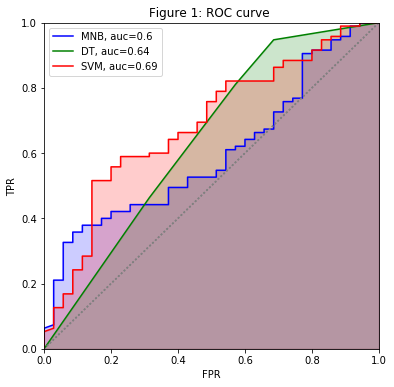

In [38]:
plot_roc(X_test, y_test, GridSearchCV_List)

### Plot PR Curve

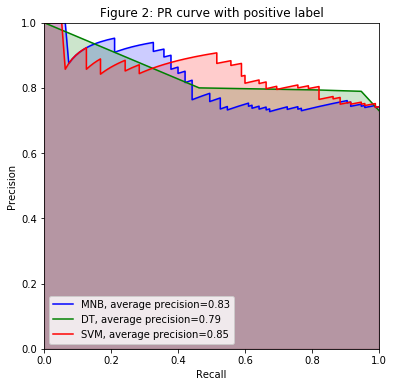

In [39]:
plot_pr(X_test, y_test, GridSearchCV_List, tittle = 'with positive label')

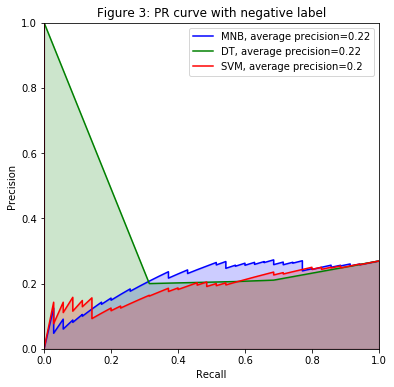

In [40]:
plot_pr(X_test, y_test, GridSearchCV_List, lab=0, tittle = 'with negative label')

# 7. Choose The Best Model

In [41]:
best_score = df_report_gs['Balanced_Accuracy'].max()
best_model = df_report_gs[df_report_gs['Balanced_Accuracy']==best_score]['Model'].values[0]
display(best_model)
best_model_name = best_model
best_model = locals()[best_model].best_estimator_
best_model

'DT_gs'

Pipeline(memory=None,
     steps=[('TFIDF', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,...         min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best'))])

# 8. Syntactic Analysis

## All Sentiment

1346


[('good service', 42),
 ('long time', 24),
 ('ramathibodi hospital', 14),
 ('first time', 13),
 ('good advice', 12),
 ('good care', 10),
 ('good doctor', 10),
 ('rama hospital', 9),
 ('public hospital', 8),
 ('state hospital', 8)]

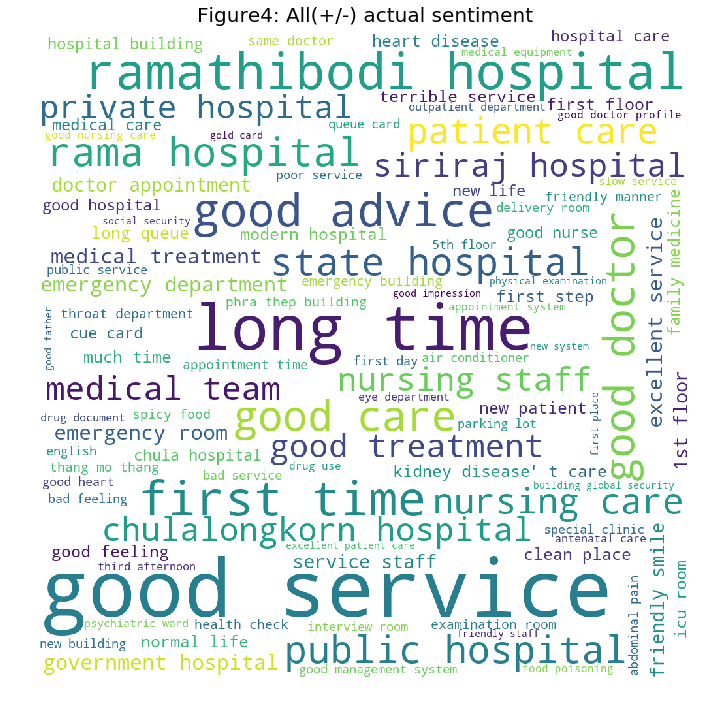

In [42]:
noun_phase_list = []
for i in range(len(df_all['comment_eng'])):
    np = TextBlob(df_all['comment_eng'][i].lower(), np_extractor=extractor).noun_phrases
    noun_phase_list.extend(np)
print(len(noun_phase_list))
noun_phase_list

dict_np = Counter(noun_phase_list)
sorted_dict_np = sorted(dict_np.items(), key = lambda kv: kv[1], reverse=True)
display(sorted_dict_np[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_np)
plt.imshow(wc)
plt.title('Figure'+ str((next(Fignum))) + ': All(+/-) actual sentiment', fontsize=20)
plt.axis("off")
plt.show()

In [112]:
elim_wd = ['hospital', 'long time', 'medical team', 'doctor', 'nurse', 'doctor nurse', 'service', 
           'ramathibodi hospital', 'rama hospital', 'chula hospital', 'chulalongkorn hospital', 'siriraj hospital', 
           'state hospital']

1294


[('good service', 42),
 ('long time', 24),
 ('first time', 13),
 ('good advice', 12),
 ('good care', 10),
 ('good doctor', 10),
 ('public hospital', 8),
 ('patient care', 7),
 ('nursing care', 7),
 ('private hospital', 6)]

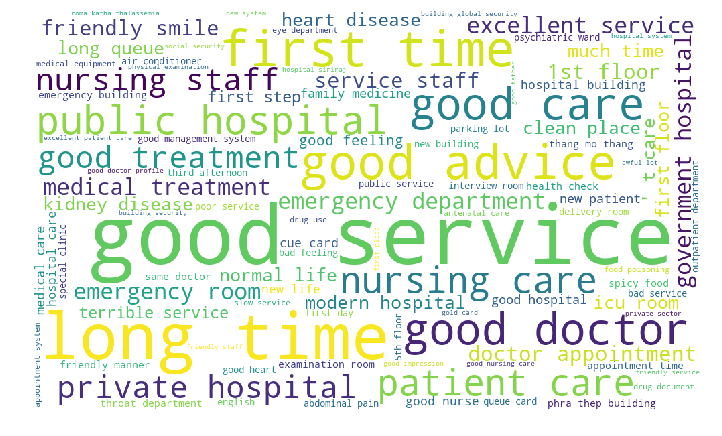

In [44]:
noun_phase_list = []
for i in range(len(df_all['comment_eng'])):
    np = TextBlob(df_all['comment_eng'][i].lower(), np_extractor=extractor).noun_phrases
    noun_phase_list.extend(np)
noun_phase_list = [x for x in noun_phase_list if x not in elim_wd]
print(len(noun_phase_list))
noun_phase_list

dict_np = Counter(noun_phase_list)
sorted_dict_np = sorted(dict_np.items(), key = lambda kv: kv[1], reverse=True)
display(sorted_dict_np[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(background_color="white",width=1000,height=600, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_np)
plt.imshow(wc)
#plt.title('Figure'+ str((next(Fignum))) + ': All(+/-) actual sentiment without meaningless', fontsize=20)
plt.axis("off")
plt.show()

## Positive Sentiment by actual (sentiment) class

In [45]:
TFIDF_pos = best_model.steps[0][1]
TFIDF_pos

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [46]:
df_pos = df[df['sentiment']==1]['preprocessed']
tfidf_matrix_pos = TFIDF_pos.fit_transform(df_pos)

[('good', 35.88174785484213),
 ('doctor', 27.398584210959807),
 ('service', 21.99085127044168),
 ('hospital', 21.581518544106515),
 ('not', 19.862135178789437),
 ('patient', 18.818836235073384),
 ('nurse', 17.2400883833727),
 ('care', 13.399647588707182),
 ('well', 12.882587344850629),
 ('good service', 11.787999715194196)]

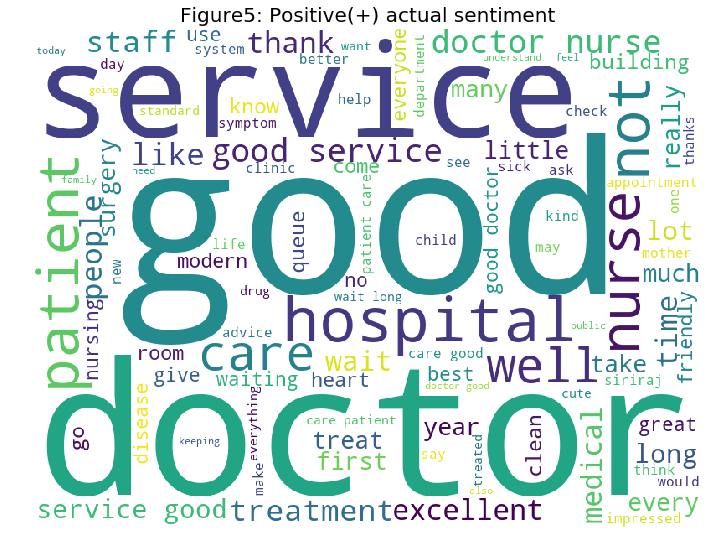

In [47]:
freqs_pos = [(word, tfidf_matrix_pos.getcol(idx).sum()) for word, idx in TFIDF_pos.vocabulary_.items()]
dict_freqs_pos = dict(freqs_pos)
sorted_dict_pos = sorted(dict_freqs_pos.items(), key=lambda kv: kv[1], reverse=True)
display(sorted_dict_pos[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=100).generate_from_frequencies(dict_freqs_pos)
plt.imshow(wc)
plt.title('Figure'+ str((next(Fignum))) + ': Positive(+) actual sentiment', fontsize=20)
plt.axis("off")
plt.show()

In [48]:
tag_pos = pos_tag(TFIDF_pos.get_feature_names())
#print("Part of Speech of Positive word: ", tag_pos)

[('doctor', 27.398584210959807),
 ('service', 21.99085127044168),
 ('patient', 18.818836235073384),
 ('care', 13.399647588707182),
 ('doctor nurse', 11.125580453637717),
 ('time', 9.686292499429719),
 ('treatment', 9.592888662236366),
 ('staff', 9.335093262039582),
 ('thank', 8.637456012437468),
 ('people', 8.577207062452048)]

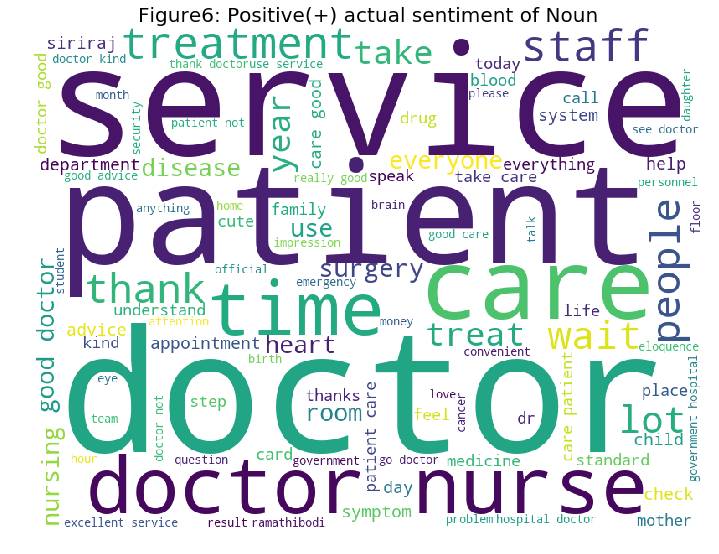

In [49]:
noun_list_pos = [item[0] for item in tag_pos if 'NN' in item[1]]  
dict_pos_noun = {key:dict_freqs_pos[key] for key in noun_list_pos}
sorted_dict_pos_noun = sorted(dict_pos_noun.items(), key=lambda kv: kv[1], reverse=True)
display(sorted_dict_pos_noun[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=100).generate_from_frequencies(dict_pos_noun)
plt.imshow(wc)
plt.title('Figure'+ str((next(Fignum))) + ': Positive(+) actual sentiment of Noun', fontsize=20)
plt.axis("off")
plt.show()

In [50]:
df_pos_4 = df[df['sentiment']==1].loc[:,['comment_eng','preprocessed']]
df_pos_4 = df_pos_4.reset_index(drop=True)
df_pos_4['Pos_tag'] = df_pos_4['preprocessed'].apply(lambda x : TextBlob(x).tags)
df_pos_4['Shallow_parse'] = df_pos_4['Pos_tag'].apply(lambda x : cp.parse(x).__str__())
df_pos_4['NP'] = df_pos_4['preprocessed'].apply(lambda x: TextBlob(x,np_extractor=extractor).noun_phrases)
display(len(df_pos_4))
df_pos_4.head()

473

comment_eng                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      preprocessed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Pos_tag                                                                                                                                                                                                                                                                                                                                                                                                                

969


[('good service', 38),
 ('long time', 14),
 ('good advice', 11),
 ('ramathibodi hospital', 11),
 ('good care', 10),
 ('first time', 9),
 ('good doctor', 9),
 ('public hospital', 8),
 ('rama hospital', 8),
 ('state hospital', 7)]

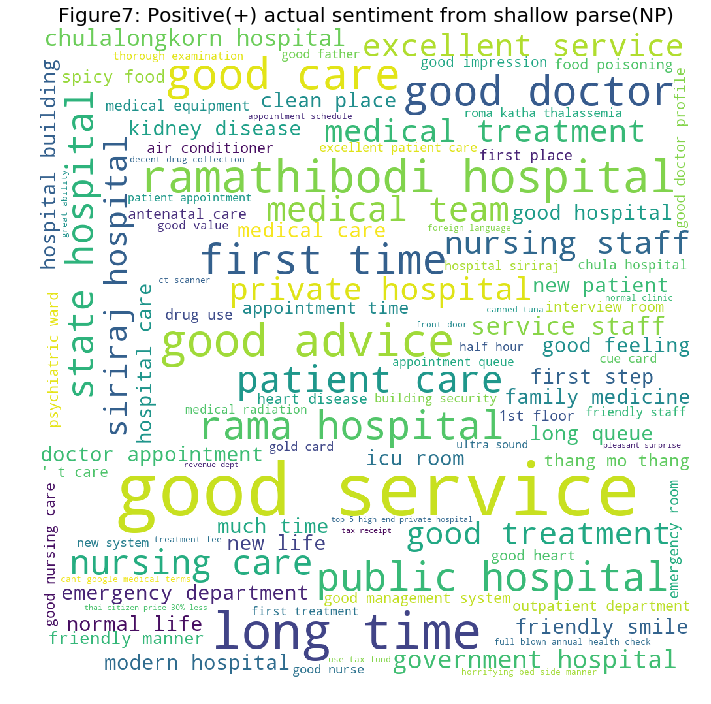

In [51]:
noun_phase_list = []
for i in range(len(df_pos_4['comment_eng'])):
    np = TextBlob(df_pos_4['comment_eng'][i].lower(), np_extractor=extractor).noun_phrases
    noun_phase_list.extend(np)
print(len(noun_phase_list))
noun_phase_list

dict_np = Counter(noun_phase_list)
sorted_dict_np = sorted(dict_np.items(), key = lambda kv: kv[1], reverse=True)
display(sorted_dict_np[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_np)
plt.imshow(wc)
plt.title('Figure'+ str((next(Fignum))) + ': Positive(+) actual sentiment from shallow parse(NP)', fontsize=20)
plt.axis("off")
plt.show()

In [52]:
df_show = df_rama.copy()
# df_pos_4
df_show_pos = df_show[df_show['score']>3]
df_pos_4.head(2)

comment_eng                                                                                                                                                                                                                                                                             preprocessed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Pos_tag                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Shallow_parse                                                                                                                                                                              NP
0  I used to go to LASIK here. Very good. Now, it has been 2 years since it has no effect. And the price is also good. The cut may look scary. But when it was really time to do it, it didn't hurt. Because there was anesthetic drops before dissection                                                                                                                                                                                           used go lasik good 2 year since no effect price also good cut may look scary really time not hurt anesthetic drop dissection                                                                                                                                                             [(used, VBN), (go, VB), (lasik, RB), (good, JJ), (2, CD), (year, NN), (since, IN), (no, DT), (effect, NN), (price, NN), (also, RB), (good, JJ), (cut, NN), (may, MD), (look, VB), (scary, JJ), (really, RB), (time, NN), (not, RB), (hurt, VBN), (anesthetic, JJ), (drop, NN), (dissection, NN)]                                                                                                                                                                                                                                                                                                (S\n  used/VBN\n  go/VB\n  lasik/RB\n  good/JJ\n  2/CD\n  (NP year/NN)\n  since/IN\n  (NP no/DT effect/NN)\n  (NP price/NN)\n  also/RB\n  (NP good/JJ cut/NN)\n  may/MD\n  look/VB\n  scary/JJ\n  really/RB\n  (NP time/NN)\n  not/RB\n  hurt/VBN\n  (NP anesthetic/JJ drop/NN)\n  (NP dissection/NN))                                                                                                                                                                                                                                                                                                                    [effect price, anesthetic drop dissection]                                                                                                                                    
1  Maintained for many years since the age of 14 Will now have a bachelor's degree From sleeping in the midst of the arthropod until he recovered, he could live a normal life. In particular, premium clinics do not have to wait for a long time. There are convenient, fast, every step 

926


[('good service', 38),
 ('long time', 14),
 ('good advice', 11),
 ('good care', 10),
 ('first time', 9),
 ('good doctor', 9),
 ('public hospital', 8),
 ('patient care', 7),
 ('nursing care', 6),
 ('private hospital', 5)]

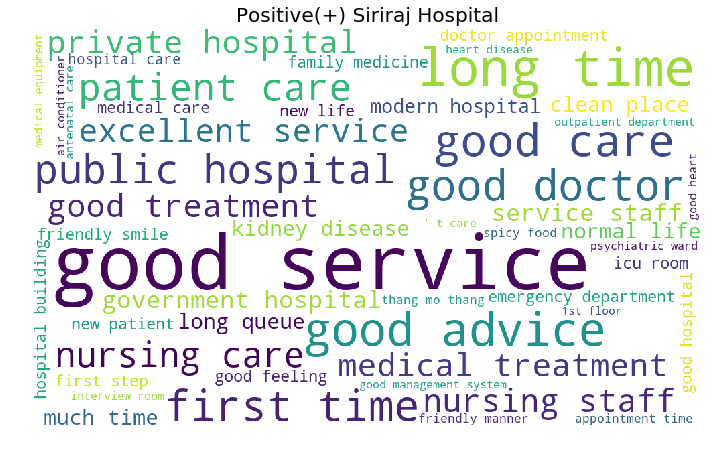

In [53]:
# df_rama
# df_chula 
# df_siriraj

df_show = df_all.copy()
# df_show_pos = df_show[df_show['score']>3]
df_show_pos = df_show[df_show['sentiment']==1]
df_show_pos = df_show_pos.reset_index(drop=True)

noun_phase_list = []
for i in range(len(df_show_pos['comment_eng'])):
    np = TextBlob(df_show_pos['comment_eng'][i].lower(), np_extractor=extractor).noun_phrases
    noun_phase_list.extend(np)
noun_phase_list = [x for x in noun_phase_list if x not in elim_wd]
print(len(noun_phase_list))
noun_phase_list

dict_np = Counter(noun_phase_list)
sorted_dict_np = sorted(dict_np.items(), key = lambda kv: kv[1], reverse=True)
display(sorted_dict_np[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(background_color="white",width=1000,height=600, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_np)
plt.imshow(wc)
# plt.title('Figure'+ str((next(Fignum))) + ': Positive(+) actual sentiment from shallow parse(NP)', fontsize=20)
# plt.title('Positive(+) Ramathibodi Hospital', fontsize=20)
# plt.title('Positive(+) Chulalongkorn Hospital', fontsize=20)
plt.title('Positive(+) Siriraj Hospital', fontsize=20)
plt.axis("off")
plt.show()

## Positive Sentiment by predict (best_model) class

In [54]:
col_pre = best_model_name[:-2]+'predict'
col_pre

'DT_predict'

In [55]:
df_pos_pre = df_all[df_all[col_pre]==1].loc[:,['comment_eng','preprocessed']]
df_pos_pre = df_pos_pre.reset_index(drop=True)
df_pos_pre['Pos_tag'] = df_pos_pre['preprocessed'].apply(lambda x : TextBlob(x).tags)
df_pos_pre['Shallow_parse'] = df_pos_pre['Pos_tag'].apply(lambda x : cp.parse(x).__str__())
df_pos_pre['NP'] = df_pos_pre['preprocessed'].apply(lambda x: TextBlob(x,np_extractor=extractor).noun_phrases)
display(len(df_pos_pre))
df_pos_pre.head()

545

comment_eng                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      preprocessed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Pos_tag                                                                                                                                                                                                                                                                                                                                                                                                                

1069


[('good service', 38),
 ('long time', 19),
 ('ramathibodi hospital', 12),
 ('good advice', 10),
 ('good care', 10),
 ('good doctor', 10),
 ('first time', 9),
 ('rama hospital', 8),
 ('public hospital', 7),
 ('state hospital', 7)]

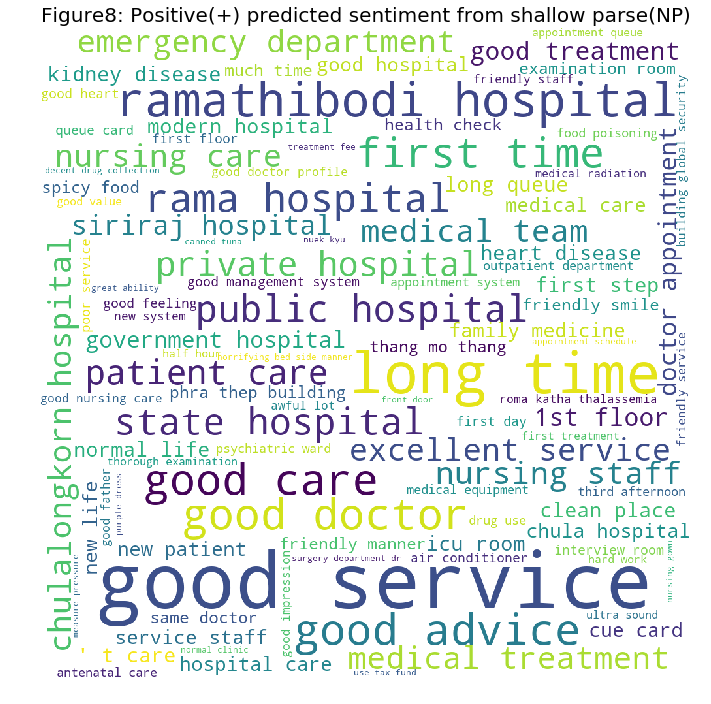

In [56]:
noun_phase_list = []
for i in range(len(df_pos_pre['comment_eng'])):
    np = TextBlob(df_pos_pre['comment_eng'][i].lower(), np_extractor=extractor).noun_phrases
    noun_phase_list.extend(np)
print(len(noun_phase_list))
noun_phase_list

dict_np = Counter(noun_phase_list)
sorted_dict_np = sorted(dict_np.items(), key = lambda kv: kv[1], reverse=True)
display(sorted_dict_np[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_np)
plt.imshow(wc)
plt.title('Figure'+ str((next(Fignum))) + ': Positive(+) predicted sentiment from shallow parse(NP)', fontsize=20)
plt.axis("off")
plt.show()

## Negative Sentiment by actual (sentiment) class

In [57]:
TFIDF_neg = best_model.steps[0][1]
TFIDF_neg

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [58]:
df_neg = df[df['sentiment']==0]['preprocessed']
tfidf_matrix_neg = TFIDF_neg.fit_transform(df_neg)

[('not', 12.959842997433494),
 ('hospital', 8.985310485098278),
 ('doctor', 7.4879365055433675),
 ('patient', 7.022452632515532),
 ('service', 6.745901396803172),
 ('nurse', 6.6323770525108285),
 ('good', 6.341524182359717),
 ('time', 6.0474678950765615),
 ('wait', 5.91911597449902),
 ('bad', 5.410492725711295)]

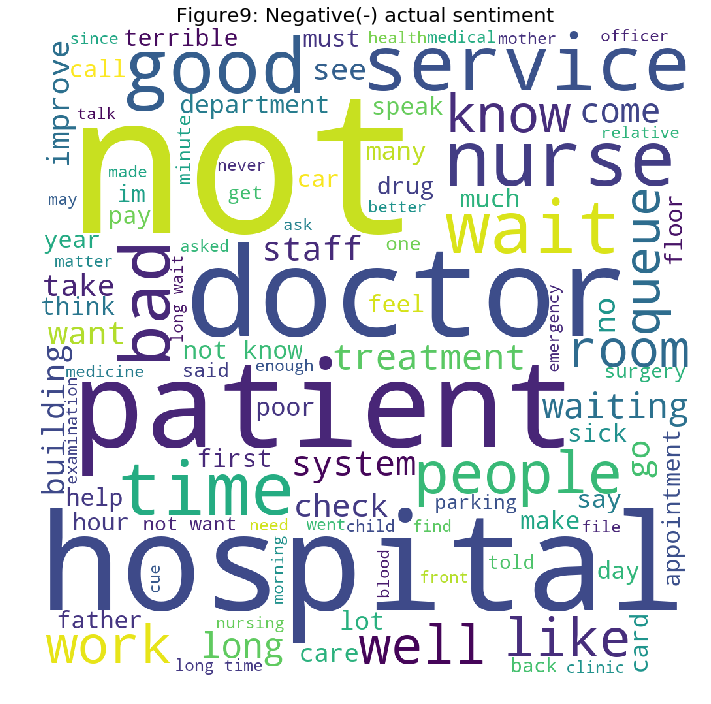

In [59]:
freqs_neg = [(word, tfidf_matrix_neg.getcol(idx).sum()) for word, idx in TFIDF_neg.vocabulary_.items()]
dict_freqs_neg = dict(freqs_neg)
sorted_dict_neg = sorted(dict_freqs_neg.items(), key=lambda kv: kv[1], reverse=True)
display(sorted_dict_neg[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_freqs_neg)
plt.imshow(wc)
plt.title('Figure'+ str((next(Fignum))) + ': Negative(-) actual sentiment', fontsize=20)
plt.axis("off")
plt.show()

In [60]:
tag_neg = pos_tag(TFIDF_neg.get_feature_names())
#print("Part of Speech of Negative word: ",tag_neg )

[('hospital', 8.985310485098278),
 ('doctor', 7.4879365055433675),
 ('service', 6.745901396803172),
 ('time', 6.0474678950765615),
 ('people', 5.3920138616696365),
 ('work', 4.261176653421808),
 ('room', 4.065030836111619),
 ('treatment', 3.8715654049799566),
 ('system', 3.64141718246061),
 ('staff', 3.3841521766660962)]

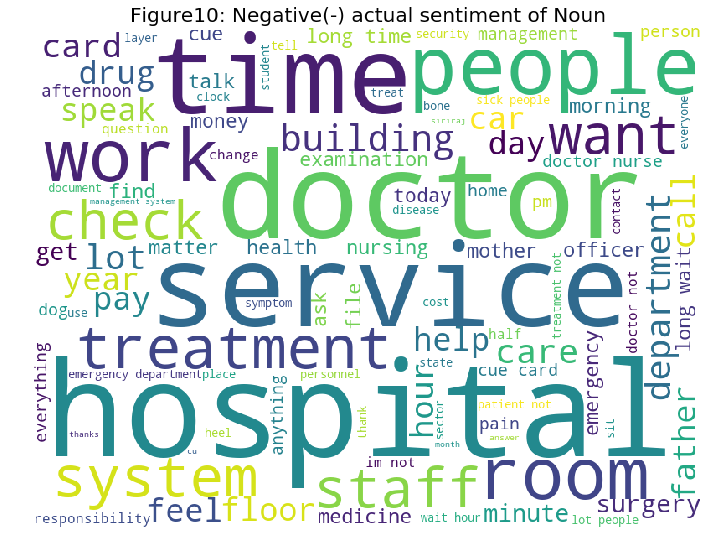

In [61]:
noun_list_neg = [item[0] for item in tag_neg if 'NN' in item[1]]  
dict_neg_noun = {key:dict_freqs_neg[key] for key in noun_list_neg}
sorted_dict_neg_noun = sorted(dict_neg_noun.items(), key=lambda kv: kv[1], reverse=True)
display(sorted_dict_neg_noun[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(width=800,height=600,mode='RGBA',background_color='white',max_words=100).generate_from_frequencies(dict_neg_noun)
plt.imshow(wc)
plt.title('Figure'+ str((next(Fignum))) + ': Negative(-) actual sentiment of Noun', fontsize=20)
plt.axis("off")
plt.show()

In [62]:
df_neg_4 = df[df['sentiment']==0].loc[:,['comment_eng','preprocessed']]
df_neg_4 = df_neg_4.reset_index(drop=True)
df_neg_4['Pos_tag'] = df_neg_4['preprocessed'].apply(lambda x : TextBlob(x).tags)
df_neg_4['Shallow_parse'] = df_neg_4['Pos_tag'].apply(lambda x : cp.parse(x).__str__())
df_neg_4['NP'] = df_neg_4['preprocessed'].apply(lambda x: TextBlob(x,np_extractor=extractor).noun_phrases)
display(len(df_neg_4))
df_neg_4.head()

174

comment_eng                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              preprocessed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Pos_tag                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Shallow_parse                                                                                                                                                                                                                                       NP
0  At the 2nd floor of Phra Thep building, the place looks modern.But at the pressure measuring room There are people at the temple (thinking that it's not a nurse because wearing a purple dress) likes to scold people who come to the temple. Speak stiffly to people who come to measure pressure. In spite of the other nurses who put on a nursing gown, said because Want to improve Come to the doctor at the surgery department Dr. Tawut, then told to have surgery. Just saying that he had to surgery to be healed at that time, he was shocked about the surgery. And the fog went, not really telling what was the distance (Roi-Laem) and then meeting The nurse at Nuek Kyu doesn't care when we repeat what he says is correct. Just saying that In conclusion, it seems to be good, but waiting to see the surgery before  2nd floor phra thep building place look modernbut pressure measuring room people temple thinking not nurse wearing purple dress like scold people come temple speak stiffly people come measure pressure spite nurse put nursing gown said want improve come doctor surgery department dr tawut 

377


[('long time', 10),
 ('good service', 4),
 ('first time', 4),
 ('emergency room', 3),
 ('terrible service', 3),
 ('ramathibodi hospital', 3),
 ('first floor', 2),
 ('1st floor', 2),
 ('queue card', 2),
 ('emergency department', 2)]

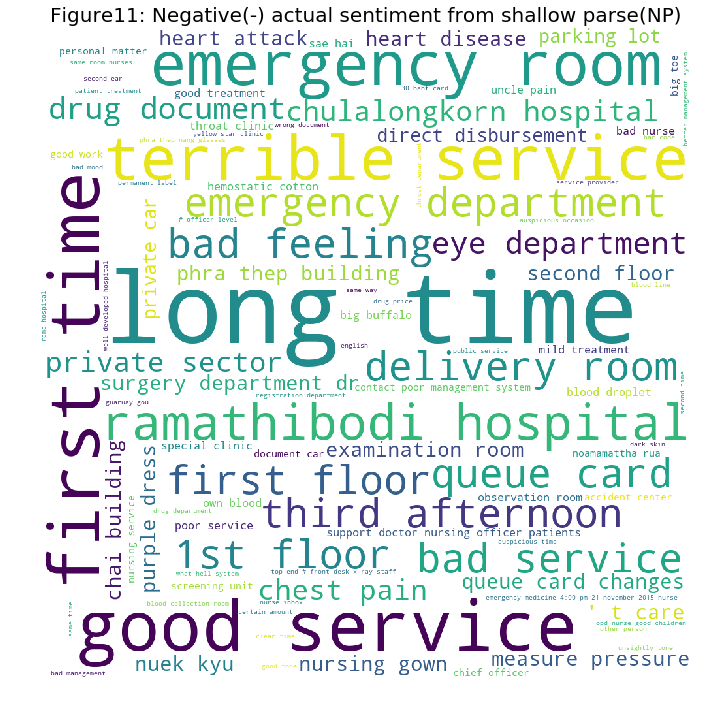

In [63]:
noun_phase_list = []
for i in range(len(df_neg_4['comment_eng'])):
    np = TextBlob(df_neg_4['comment_eng'][i].lower(), np_extractor=extractor).noun_phrases
    noun_phase_list.extend(np)
print(len(noun_phase_list))
noun_phase_list

dict_np = Counter(noun_phase_list)
sorted_dict_np = sorted(dict_np.items(), key = lambda kv: kv[1], reverse=True)
display(sorted_dict_np[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_np)
plt.imshow(wc)
plt.title('Figure'+ str((next(Fignum))) + ': Negative(-) actual sentiment from shallow parse(NP)', fontsize=20)
plt.axis("off")
plt.show()

In [64]:
df_all['sentiment'].sum()

473

368


[('long time', 10),
 ('good service', 4),
 ('first time', 4),
 ('emergency room', 3),
 ('terrible service', 3),
 ('first floor', 2),
 ('1st floor', 2),
 ('queue card', 2),
 ('emergency department', 2),
 ('bad service', 2)]

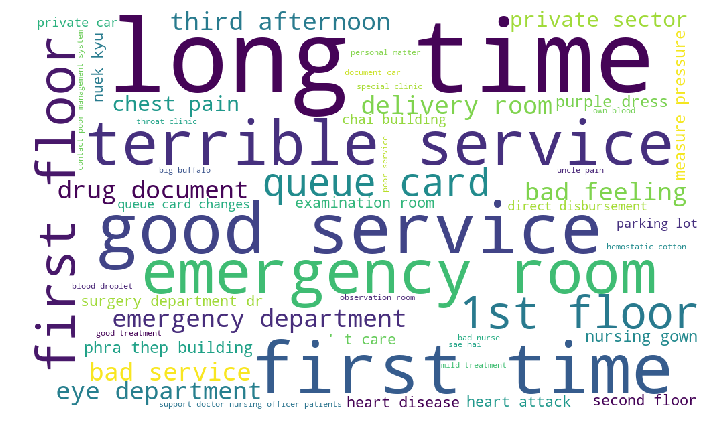

In [65]:
# df_rama
# df_chula 
# df_siriraj

df_show = df_all.copy()
# df_show_neg = df_show[df_show['score']<4]
df_show_neg = df_show[df_show['sentiment']==0]
df_show_neg = df_show_neg.reset_index(drop=True)
# print(len(df_show_neg))
# display(df_show_neg.head())


noun_phase_list = []
for i in range(len(df_show_neg['comment_eng'])):
    np = TextBlob(df_show_neg['comment_eng'][i].lower(), np_extractor=extractor).noun_phrases
    noun_phase_list.extend(np)
noun_phase_list = [x for x in noun_phase_list if x not in elim_wd]
print(len(noun_phase_list))
noun_phase_list

dict_np = Counter(noun_phase_list)
sorted_dict_np = sorted(dict_np.items(), key = lambda kv: kv[1], reverse=True)
display(sorted_dict_np[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(background_color="white",width=1000,height=600, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_np)
plt.imshow(wc)
# plt.title('Negative(-) actual sentiment from shallow parse(NP)', fontsize=20)
# plt.title('Negative(-) Ramathibodi Hospital', fontsize=20)
# plt.title('Negative(-) Chulalongkorn Hospital', fontsize=20)
# plt.title('Negative(-) Siriraj Hospital', fontsize=20)
plt.axis("off")
plt.show()

## Negative Sentiment by predict (best_model) class

In [66]:
df_neg_pre = df_all[df_all[col_pre]==0].loc[:,['comment_eng','preprocessed']]
df_neg_pre = df_neg_pre.reset_index(drop=True)
df_neg_pre['Pos_tag'] = df_neg_pre['preprocessed'].apply(lambda x : TextBlob(x).tags)
df_neg_pre['Shallow_parse'] = df_neg_pre['Pos_tag'].apply(lambda x : cp.parse(x).__str__())
df_neg_pre['NP'] = df_neg_pre['preprocessed'].apply(lambda x: TextBlob(x,np_extractor=extractor).noun_phrases)
display(len(df_neg_pre))
df_neg_pre.head()

102

comment_eng                                                                                                                                                                                                                                                                                                                                       preprocessed                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Pos_tag                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Shallow_parse                                                                                                                                                                                 NP
0  Treatment is considered okay. But the parking lot should be greatly improved Because the patient came to the doctor each time there was no parking In the hospital Die hard Sick people, relatives come to visit, patients have to go to the car to pump oil and take a taxi And will come to a private car for Large, wealthy hospitals. Recommended to do at the car like in the mall. Do many layers to support the doctor Nursing Officer Patients do not have to pay attention.                                                                                                                                                           treatment considered okay parking lot greatly improved patient came doctor time no parking hospital die hard sick people relative come visit patient go car pump oil take taxi come private car large wealthy hospital recommended car like mall many layer support doctor nursing officer patient not pay attention                               [(treatment, NN), (considered, VBN), (okay, IN), (parking, VBG), (lot, NN), (greatly, RB), (improved, VBN), (patient, NN), (came, VBD), (doctor, JJ), (time, NN), (no, DT), (parking, VBG), (hospital, NN), (die, VB), (hard, JJ), (sick, JJ), (people, NNS), (relative, VBP), (come, JJ), (visit, NN), (patient, NN), (go, VBP), (car, NN), (pump, NN), (oil, NN), (take, VB), (taxi, NN), (come, VB), (private, JJ), (car, NN), (large, JJ), (wealthy, JJ), (hospital, NN), (recommended, VBD), (car, NN), (like, IN), (mall, NN), (many, JJ), (layer, JJ), (support, NN), (doctor, NN), (nursing, VBG), (officer, NN), (patient, NN), (not, RB), (pay, VB), (attention, NN)]                                                                                      (S\n  (NP treatment/NN)\n  considered/VBN\n  okay/IN\n  parking/VBG\n  (NP lot/NN)\n  greatly/RB\n  improved/VBN\n  (NP patient/NN)\n  came/VBD\n  (NP doctor/JJ time/NN)\n  no/DT\n  parking/VBG\n  (NP hospital/NN)\n  die/VB\n  hard/JJ\n  sick/JJ\n  

277


[('long time', 5),
 ('good service', 4),
 ('emergency room', 4),
 ('first time', 4),
 ('terrible service', 3),
 ('hospital building', 3),
 ('bad feeling', 2),
 ('delivery room', 2),
 ('ramathibodi hospital', 2),
 ('eye department', 2)]

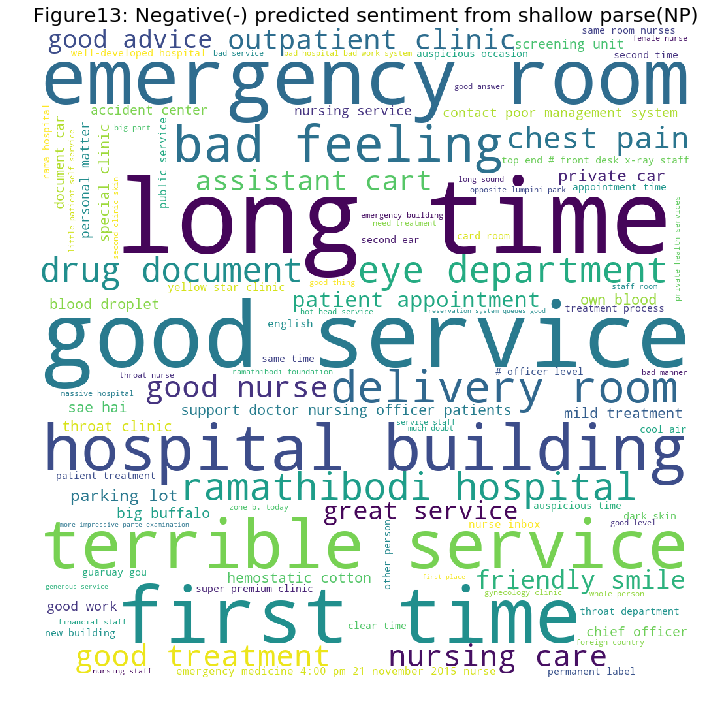

In [110]:
noun_phase_list = []
for i in range(len(df_neg_pre['comment_eng'])):
    np = TextBlob(df_neg_pre['comment_eng'][i].lower(), np_extractor=extractor).noun_phrases
    noun_phase_list.extend(np)
print(len(noun_phase_list))
noun_phase_list

dict_np = Counter(noun_phase_list)
sorted_dict_np = sorted(dict_np.items(), key = lambda kv: kv[1], reverse=True)
display(sorted_dict_np[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=100,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_np)
plt.imshow(wc)
plt.title('Figure'+ str((next(Fignum))) + ': Negative(-) predicted sentiment from shallow parse(NP)', fontsize=20)
plt.axis("off")
plt.show()

#  Question

![title](./img/Assignment.png)

## **Answer**
- 1-2 already done and save as .csv file name 'rama_comment.csv'
- 3 I decide to conduct experiment with two class 'Positive' as 1 with score 4s,5s and 'Negative' as 0 with score 1s,2s (Remove any 'neutral' score equal to 3s)
- 4 I do this in Data pre-processing step
- 5 I do this in Tuning and Develop Model step
- 6 I do this in Data pre-processing step
- 7 I do this in Tuning and Developing Model step. And k is come from GridsearchCV.
- 8 I Choose 3 machine learning models that is Multinomial naive bayes, Decision tree, Support vector machine and split data by test size = 0.20
- 9 I got Decision tree is the best model for predict sentiment class. All detail is in Evaluate Model step. And Syntactic analysis is perform by shallow parsing and visualize as wordcloud.
- 10 I would like to answer below this cell


# Conclusion and Suggestion to Ramathibodi Management
- How to improve service and operation quality?



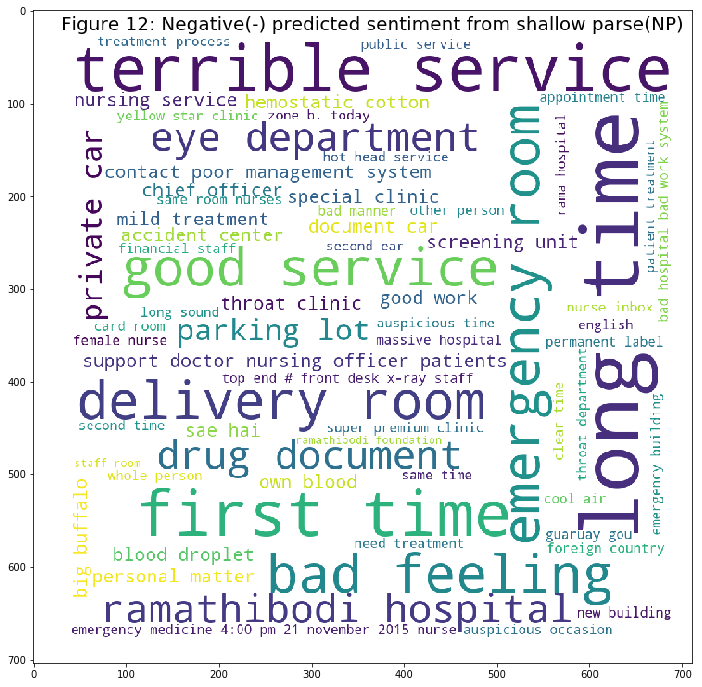

In [68]:
Figure_num = '12' #input('Plase enter your figure number(1-12): ')

img = mpimg.imread('./img/Figure' + Figure_num + '.png')
plt.figure(figsize=(12,12))
imgplot = plt.imshow(img)
plt.show()

#### Figure detail
- Figure 1-3 : Tell about model performance 
        - Figure 1 : ROC curve
        - Figure 2 : PR curve with positive label
        - Figure 3 : PR curve with negative label
- Figure 4   : Display overview how people say to Ramathibodi hospital
- Figure 5-8 : Display how people say to Ramathibodi hospital in positive sentiment
        - Figure 5 : Wordcloud with all positive word from actual class
        - Figure 6 : Wordcloud with only positive noun word from actual class
        - Figure 7 : Wordcloud with only positive noun phase from actual class
        - Figure 8 : Wordcloud with only positive noun phase from predicted class
- Figure 9-12 : Display how people say to Ramathibodi hospital in negative sentiment
        - Figure 9 : Wordcloud with all negative word from actual class
        - Figure 10: Wordcloud with only negative noun word from actual class
        - Figure 11: Wordcloud with only negative noun phase from actual class
        - Figure 12: Wordcloud with only negative noun phase from predicted class
        
#### From model performance in Evaluate Model step
- Decsion tree get the best score of balanced score with 0.64. Thus, Decision tree is the best model

#### From positive comment
- According to Figure 8, our hospital has a good service with medical team. Hence, we should keep this performance and improve to be better.

#### From negative comment
- According to Figure 12, our hospital has some terrible service because of long time. Thus, we can use this for improve the workflow to reduce waiting time.
- According to Figure 12, we might have some inconvinient for patient in emergency department. Hence, we have to figure out what is wrong in this department. And about queue card might has some issue, so, we need to check it as well. 

In [69]:
list_neg = [('first time', 4),
 ('emergency room', 3),
 ('terrible service', 3),
 ('first floor', 2),
 ('1st floor', 2),
 ('queue card', 2),
 ('emergency department', 2),
 ('bad feeling', 2),
 ('good service', 2),
 ('delivery room', 2)]

In [70]:
print(*list_neg)

('first time', 4) ('emergency room', 3) ('terrible service', 3) ('first floor', 2) ('1st floor', 2) ('queue card', 2) ('emergency department', 2) ('bad feeling', 2) ('good service', 2) ('delivery room', 2)


Our results demonstrate that some services have to improve especially the emergency department. We might have some inconvenient for a patient in the emergency department. Hence, we have to figure out what is wrong in this department. A queue card might have some issue. Therefore, we have to improve the workflow to reduce waiting time.

Due to the limitation of data collection which is collected from only a source and the number of data is small and also limitation of time which can perform just a few parameters for fine-tuning hyperparameter. These lead to the model performance is not as good as it could be. Using translation from Thai into English could affect model to mislead some meaning as well.

# Analysis on Error

In [72]:
df_all.head()

comment_th                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           comment_eng                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [103]:
((df_all['MNB_predict'] == 0) & (df_all['DT_predict'] == 0) & (df_all['SVM_predict'] == 0)).sum()

3

In [104]:
import numpy as np
incorrect_rownumbers = np.where(df_all['DT_predict']!= df_all['sentiment'])[0] # get indices of incorrect ones
# incorrect_rownumbers = np.where((df_all['sentiment'] != df_all['MNB_predict']) & (df_all['MNB_predict'] == df_all['DT_predict']) & (df_all['DT_predict'] == df_all['SVM_predict']))[0]
nincorrect = len(incorrect_rownumbers) 
nsample = 10
np.random.seed(1)
samples = np.random.choice(incorrect_rownumbers, min(nsample,nincorrect), replace=False) 
print(f'Number of incorrect: {nincorrect}')

Number of incorrect: 150


In [105]:
df_all.iloc[samples,:]

comment_th                                                                                                                                                                                                                                                                                                                                                                                                comment_eng                                                                                                                                                                                                                                                                                          preprocessed  sentiment  MNB_predict  DT_predict  SVM_predict
102  ปลายสาย022004249 ไม่ทราบว่ารับมาทำงานได้ไง พูดจาน้ำเสียงแย่มาก เวลารับบุคลากรมาทำงาน ควรจะพิจารณาให้มาก ว่าทำงานบริการนะครับ คนเจ็บป่วยคือคนมีความทุกข์ ควรจะ มีน้ำเสียงที่ดี และเป็นมิตรมากกว่านี้ รพ.ใหญ่โต ปรับปรุง บุคลากรให้ดี จะเจริญขึ้นกว่านี้ครับ                                                                         End of line 022004249 Do not know how to get to work Speak poorly Time for personnel to work Should consider That the service works Sick people are suffering people should have a good tone. And more friendly                                                                                                                                                                                            end line 022004249 not know get work speak poorly time personnel work consider service work sick people suffering people good tone friendly                                                                                                                                                           0          0            1           0          
449  เฉพาะที่ตึกนวมินทร์(ชั้น10) เจ้าหนัาที่พยาบาลรวมทั้งแม่บ้าน. บริการดี.แนะนำคนไข้ดูแล_ห่วงใยดีค่ะ....้                                                                                                                                                                                                                              Only the building Navamin (Class 10), the page you are nursing, including housewives. Good service. Good care guide patient care _ .... this.                                                                                                                                                                                                                                                              building navamin class 10 page nursing including housewife good service good care guide patient care _                                                                                                                                                                                                0          1            1           1          
386  บริการซวงแตกกับการจัดระบบบริการเมื่อไหร่จะพัฒนาสักที โดยเฉพาะเจ้าหน้าที่ที่พูดจาหมาไม่แดก ทำเหมือนไม่อยากมาทำงานบริการถ้าคุณไม่อยากมาทำงานบริการคุณออกกไปทำอย่างอื่นสิ ให้เอาคนที่เขาต้องการทำงานจริงๆมาทำ!!!!                                                                                                                     Zhuang service break with the system when you develop them. The officials, who spoke not a dog Riksdag. I do not want to run the service if you do not want your service to work out and do something else now. He took the people really do want to work !!!!                                                                                                                                             zhuang service break system develop official spoke not dog riksdag not want run service not want service work something else took people really want work                                                                                                                                             0          1            1           0          
112  คลีนิคพรีเมืยม สุดยอดครับ เหมือน ร.พ.เอกชนเลย ไม่ต้

96


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


[('hospital building', 3),
 ('good treatment', 2),
 ('emergency room', 2),
 ('patient appointment', 2),
 ('super premium clinic', 1),
 ('appointment time', 1),
 ('cool air', 1),
 ('good level', 1),
 ('good thing', 1),
 ('second clinic skin', 1)]

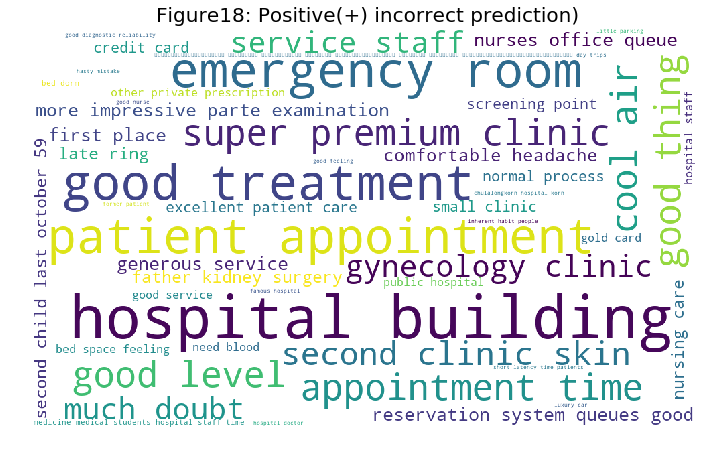

In [116]:
df_incorrect = df_all.iloc[incorrect_rownumbers,:][df_all['sentiment']==1].copy()
df_incorrect = df_incorrect.reset_index()

noun_phase_list = []
for i in range(len(df_incorrect['comment_eng'])):
    np = TextBlob(df_incorrect['comment_eng'][i].lower(), np_extractor=extractor).noun_phrases
    noun_phase_list.extend(np)
noun_phase_list = [x for x in noun_phase_list if x not in elim_wd]
print(len(noun_phase_list))
noun_phase_list

dict_np = Counter(noun_phase_list)
sorted_dict_np = sorted(dict_np.items(), key = lambda kv: kv[1], reverse=True)
display(sorted_dict_np[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(background_color="white",width=1000,height=600, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_np)
plt.imshow(wc)
plt.title('Figure'+ str((next(Fignum))) + ': Positive(+) incorrect prediction)', fontsize=20)
plt.axis("off")
plt.show()

189


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


[('first floor', 2),
 ('1st floor', 2),
 ('queue card', 2),
 ('emergency department', 2),
 ('third afternoon', 2),
 ('phra thep building', 1),
 ('purple dress', 1),
 ('measure pressure', 1),
 ('nursing gown', 1),
 ('surgery department dr', 1)]

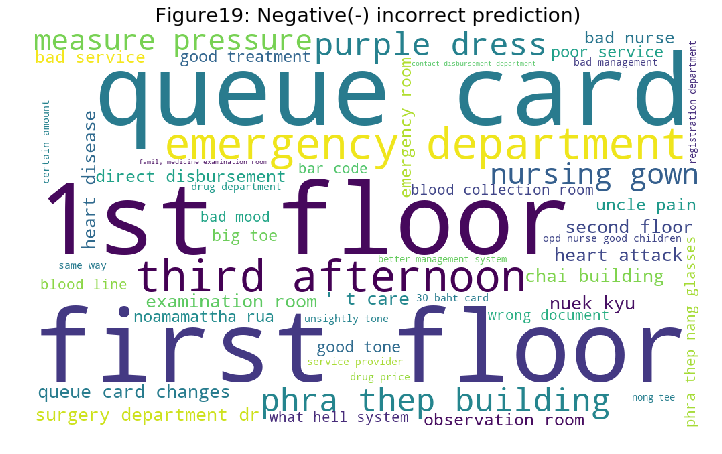

In [118]:
df_incorrect = df_all.iloc[incorrect_rownumbers,:][df_all['sentiment']==0].copy()
df_incorrect = df_incorrect.reset_index()

noun_phase_list = []
for i in range(len(df_incorrect['comment_eng'])):
    np = TextBlob(df_incorrect['comment_eng'][i].lower(), np_extractor=extractor).noun_phrases
    noun_phase_list.extend(np)
noun_phase_list = [x for x in noun_phase_list if x not in elim_wd]
print(len(noun_phase_list))
noun_phase_list

dict_np = Counter(noun_phase_list)
sorted_dict_np = sorted(dict_np.items(), key = lambda kv: kv[1], reverse=True)
display(sorted_dict_np[:10])

plt.figure(figsize=(12,12))
wc = WordCloud(background_color="white",width=1000,height=600, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(dict_np)
plt.imshow(wc)
plt.title('Figure'+ str((next(Fignum))) + ': Negative(-) incorrect prediction)', fontsize=20)
plt.axis("off")
plt.show()